In [1]:
from __future__ import print_function
import torch
%matplotlib inline

import os
import subprocess
from pathlib import Path
import numpy as np
from numpy import testing
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns

from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, Normalizer

import metric_learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors.ball_tree import BallTree
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Shogun - Metric Learning
from shogun import LMNN as shogun_LMNN
from shogun import RealFeatures, MulticlassLabels
from sklearn.utils.validation import check_X_y, check_array

# POT imports
import ot
from ot.datasets import get_1D_gauss as gauss

# MML import 
from mml import wasserstein, transform, gml, ot_testing, datasets, helper

data_path = str(Path(os.getcwd())) + "/data/"
results_path = str(Path(os.getcwd())) + "/results/binary"


In [2]:
gpu = torch.cuda.is_available()
gpu

True

In [2]:
# Load Hellinger representation of the data 
X,Y = datasets.load_mnist("Hellinger")
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.25,test_size=0.75,random_state=123)

In [4]:
data_dict = datasets.dictionary(X,Y)

# We can have at most 45 unique pairs, create all possible pairs 
[x12,y12] = datasets.data_pairs(data_dict,1,2)

X_train,X_test,Y_train,Y_test = train_test_split(x12,y12,train_size=0.25,test_size=0.75,random_state=123)

# Transform into histogram 
# Neither Wasserstein POT nor LMNN are normalized, have to do it yourself
#[X_train_normalized, X_test_normalized] = transform.normalize(X_train,X_test,'l1')

X_train_normalized = X_train/X_train.sum(axis=1).reshape((-1,1))
X_test_normalized = X_test/X_test.sum(axis=1).reshape((-1,1))
n = X_train_normalized.shape[0]

In [5]:
# These are independent of what data we choose, only on the dimensionality of a datapoint, i.e. here is 64
d = X_train.shape[1]
x = np.arange(d,dtype=np.float64)
x1 = x.reshape((d,1))
# By default metric ='sqeuclidean' in the function
M_sqeuclidean = ot.dist(x1,x1,metric='sqeuclidean')
M_eye = ot.dist(x1,x1,metric='hamming')

xx,yy = np.meshgrid(np.arange(8),np.arange(8))
xy = np.hstack((xx.reshape(-1,1),yy.reshape(-1,1)))
M_mesh = ot.dist(xy, xy)

### Test Wasserstein distance on GPU


In [8]:
# This is just to show that there are numerical errors when computing the coupling/distances. 
# In the algorithms, I just say entry at i,j equals j,i, so T1 == T2 
r = X_train_normalized[1]
c = X_train_normalized[3]
m = X_train_normalized[2]
n = X_train_normalized[4]

G1 = wasserstein.distance(r,c, **{'ground metric': M_eye})
[T1,M1] = wasserstein.coupling(r,c,**{'ground metric': M_eye})

[T2,M2] = wasserstein.coupling(c,r,**{'ground metric': M_eye})


print('Distance is: {0}'.format(G1))

Distance is: 0.41690076244381286


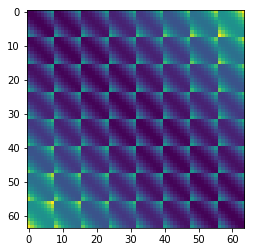

In [6]:
plt.imshow(M_mesh)

In [2]:
x = torch.Tensor(5, 3)
print(x)

y = torch.Tensor(5,3)
print(y)


 9.3513e+19  4.5581e-41  7.3700e-37
 0.0000e+00  2.1771e-04  4.8573e-38
 6.8664e-44  0.0000e+00  8.3937e-37
 0.0000e+00  9.3512e+19  4.5581e-41
 7.3359e-37  0.0000e+00  6.4381e-37
[torch.FloatTensor of size 5x3]



In [ ]:
torch.cuda.set_device(0)

In [ ]:
torch.cuda.current_device()

In [ ]:
x = x.cuda()
y = y.cuda()
print(x + y)

In [ ]:
if torch.cuda.is_available():
    

In [10]:
if torch.cuda.is_available():
    device = torch.cuda.set_device(0)          # a CUDA device object
    y = torch.Tensor(5,3).to(device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double)) 

AttributeError: 'torch.FloatTensor' object has no attribute 'to'